
### THE SPARKS FOUNDATION INTERNSHIP: Data Science And Business Analytics Intern
### TASK1:Prediction Using Supervised Machine Learning (Student score prediction)
### PROJECT BY OLUWATOMISIN AROKODARE

### Objective of the project
**This is a simple linear regression task as it involves just 2 variables.I will be predicting the percentage of a student score based on the number of study hours.**

**The dataset used for this project can be found here :http://bit.ly/w-data**

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
data=pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Checking the shape of the data 
data.shape

(25, 2)

In [4]:
#Checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#checking for duplicate values
data.duplicated().sum()

0

In [7]:
#Checking the data summary statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


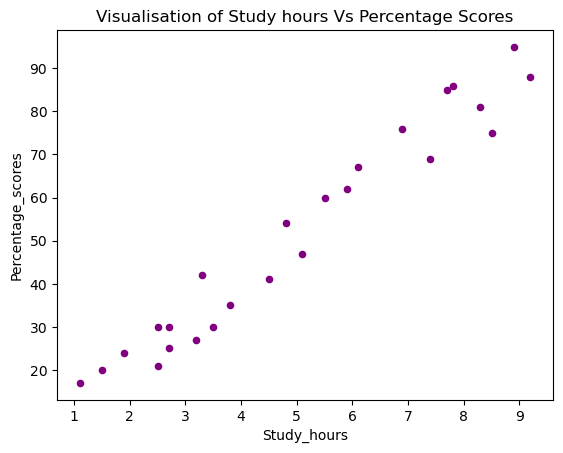

In [8]:
#Visualizing the data
#Plotting the distribution of Score
data.plot(kind="scatter",x="Hours",y="Scores",color='purple')
plt.xlabel("Study_hours")
plt.ylabel("Percentage_scores")
plt.title("Visualisation of Study hours Vs Percentage Scores")
plt.show()

In [9]:
### Simple Linear Regression 
### Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics


In [10]:
#Dividing the Data into Attribute and Label and assigning it to X and Y values
X=data.iloc[:,:-1].values  #attribute
y=data.iloc[:,1].values    #label

In [11]:
#printing the shape
print(X.shape)
print(y.shape)

(25, 1)
(25,)


In [12]:
#### Split the data into train and test using scikit_learn in built function
##The data is splitted into 80% training set and 20% testing set.
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
#Training the Algorithm
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
print("Coefficient -",model.coef_)
print("Intercept -", model.intercept_)

Coefficient - [9.91065648]
Intercept - 2.018160041434683


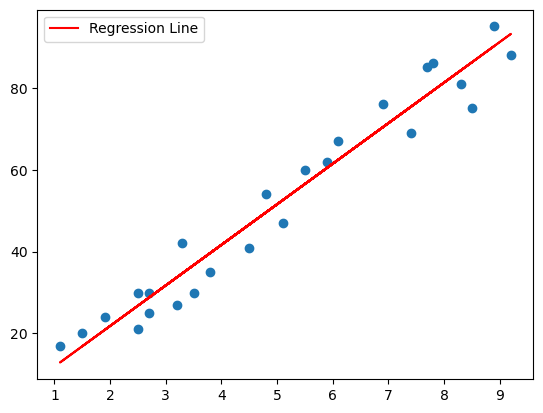

In [15]:
#Plotting the regression line
Line=model.coef_*X + model.intercept_

#Plotting for the test data
plt.scatter(X,y)
plt.plot(X,Line,color='red',label='Regression Line')
plt.legend()
plt.show()

#### The graph above shows that there is a positive linear relationship between the numbers of hours studied and percentage of scores.

In [16]:
#Making prediction
#print(x_test)
y_pred=model.predict(x_test) 
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
#Comparing Actual vs predicted score
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<Figure size 700x500 with 0 Axes>

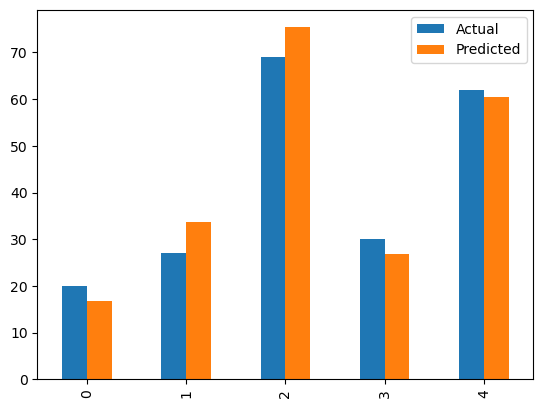

In [18]:
#Visualizing the Actual and Predicted score
plt.figure(figsize=(7, 5))
df.plot(kind='bar')
plt.show()

In [19]:
#Testing the model with a new data
#prediciting the percentage score, if a student studied for 9.25hours/day
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
new_pred=model.predict(test)

print('The number of Hours= {}'.format(hours))
print('The predicted Score ={}'.format(new_pred[0]))

The number of Hours= 9.25
The predicted Score =93.69173248737538


**Observation:The regression model shows that if a student studies for 9.25hours/day.The student is likely to score 93.69 mark score.

In [20]:
#Checking Mathematically
##Coefficient - [9.91065648]
##Intercept - 2.018160041434683
###hours - 9.25
y =9.91065648 * 9.25 + 2.018160041434683
y

93.69173248143468

In [21]:
#Evaluating the performance of the Model
# Calculate and print the Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate and print the Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate and print the Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

#Calculate and Print the R-score 
R2_score= metrics.r2_score(y_test, y_pred)
print('R2_score:', R2_score)

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R2_score: 0.9454906892105356


The R_scores shows that the model accuracy is 94.54%. 